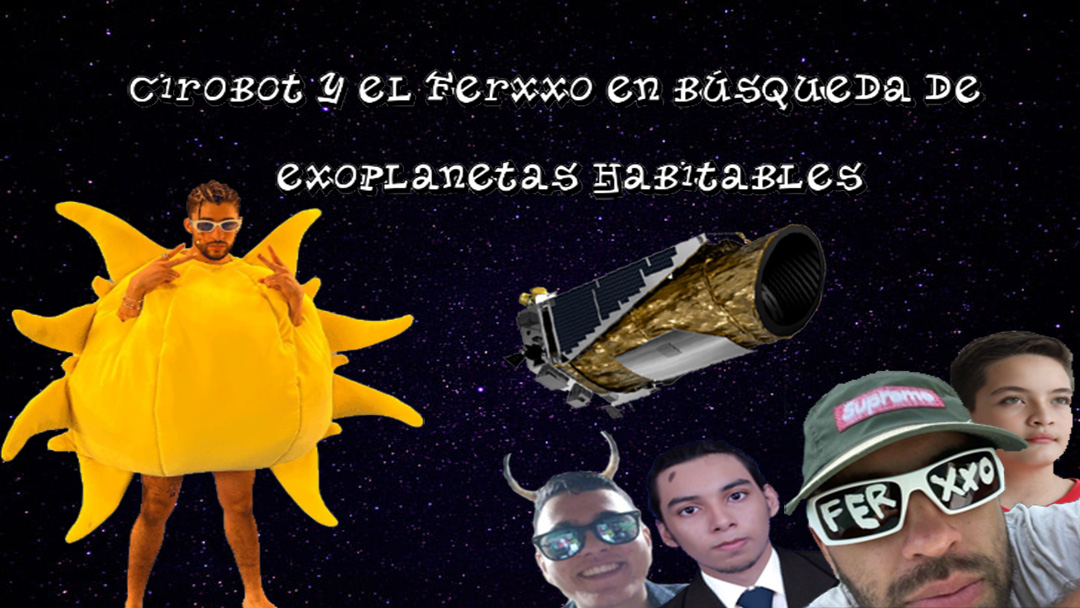

In [2]:
#@title Si te la encuentras por ahí dile que me tiene mal; no sé si todavía piensa en mí porque borracha no ha vuelto a llamar
from IPython.display import Image
Image("/content/drive/MyDrive/ai-uis-student/ProyectoFinal/banner.jpg",width=1000)

# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.datasets import *
from sklearn.metrics import *
sns.set_theme()
from google.colab import drive
 
drive.mount('/content/drive')  

Mounted at /content/drive


# Cargando el dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ai-uis-student/ProyectoFinal/cumulative.csv')
df['habitable'] = 0
df.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,habitable
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0


## Filas y columnas

### Eliminamos algunas columnas no relevantes

In [ ]:
df = df.drop(["koi_period_err1","koi_period_err2",
              "koi_time0bk_err1","koi_time0bk_err2",
              "koi_impact_err1","koi_impact_err2",
              "koi_duration_err1","koi_duration_err2",
              "koi_depth_err1","koi_depth_err2",
              "koi_prad_err1","koi_prad_err2",
              "koi_teq_err1","koi_teq_err2",
              "koi_insol_err1","koi_insol_err2",
              "koi_steff_err1","koi_steff_err2",
              "koi_slogg_err1","koi_slogg_err2",
              "koi_srad_err1","koi_srad_err2"],axis=1)

df = df.fillna({'kepler_name': 'Unknown'})

In [ ]:
df.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,habitable
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347,0
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347,0
2,3,10811496,K00753.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436,0
3,4,10848459,K00754.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597,0
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509,0


In [ ]:
print(df.shape)

(9564, 29)


#Columnas Relevantes

### Periodo Orbital (días).
El periodo orbital es el tiempo que le toma a un astro recorrer su órbita. 

In [ ]:
periodoOrbital = df['koi_period']
periodoOrbital.head(10)

0     9.488036
1    54.418383
2    19.899140
3     1.736952
4     2.525592
5    11.094321
6     4.134435
7     2.566589
8     7.361790
9    16.068647
Name: koi_period, dtype: float64

### Parámetro de impacto
La distancia proyectada en el cielo entre el centro del disco estelar y el centro del disco del planeta en la conjunción, normalizada por el radio estelar.

In [ ]:
periodoOrbital = df['koi_impact']
periodoOrbital.head(10)

0    0.146
1    0.586
2    0.969
3    1.276
4    0.701
5    0.538
6    0.762
7    0.755
8    1.169
9    0.052
Name: koi_impact, dtype: float64

### Radio del planeta

El radio del planeta. El radio planetario es el producto de la relación del radio de la estrella del planeta y el radio estelar.

In [ ]:
periodoOrbital = df['koi_prad']
periodoOrbital.head(10)

0     2.26
1     2.83
2    14.60
3    33.46
4     2.75
5     3.90
6     2.77
7     1.59
8    39.21
9     5.76
Name: koi_prad, dtype: float64

###Temperatura de equilibrio (Kelvin)
La temperatura de equilibrio planetario es una temperatura teórica a la que se vería un planeta cuando se considera simplemente como si se tratara de un cuerpo negro que se calienta solo por su estrella madre.

In [ ]:
temperaturaEquilibro = df['koi_teq']
temperaturaEquilibro.head(10)

0     793.0
1     443.0
2     638.0
3    1395.0
4    1406.0
5     835.0
6    1160.0
7    1360.0
8    1342.0
9     600.0
Name: koi_teq, dtype: float64

### Flujo de insolación
El flujo de insolación es otra forma de dar la temperatura de equilibrio. Depende de los parámetros estelares (específicamente el radio estelar y la temperatura), y del eje semi-mayor del planeta. Se da en unidades relativas a las medidas de la Tierra desde el Sol.

In [ ]:
temperaturaEquilibro = df['koi_insol']
temperaturaEquilibro.head(10)

0     93.59
1      9.11
2     39.30
3    891.96
4    926.16
5    114.81
6    427.65
7    807.74
8    767.22
9     30.75
Name: koi_insol, dtype: float64

### Temperatura fotósferica de la estrella
La temperatura fotosférica de la estrella. La fotosfera (o fotósfera) de una estrella es la superficie luminosa que delimita dicho cuerpo. 

In [ ]:
temperaturaEquilibro = df['koi_steff']
temperaturaEquilibro.head(10)

0    5455.0
1    5455.0
2    5853.0
3    5805.0
4    6031.0
5    6046.0
6    6046.0
7    6046.0
8    6227.0
9    5031.0
Name: koi_steff, dtype: float64

### Gravedad de la superficie estelar

In [ ]:
temperaturaEquilibro = df['koi_slogg']
temperaturaEquilibro.head(10)

0    4.467
1    4.467
2    4.544
3    4.564
4    4.438
5    4.486
6    4.486
7    4.486
8    3.986
9    4.485
Name: koi_slogg, dtype: float64

### Radio Estelar

In [ ]:
temperaturaEquilibro = df['koi_srad']
temperaturaEquilibro.head(10)

0    0.927
1    0.927
2    0.868
3    0.791
4    1.046
5    0.972
6    0.972
7    0.972
8    1.958
9    0.848
Name: koi_srad, dtype: float64

# Aplicando métodos

In [ ]:
DATOS = df[['habitable','kepoi_name','koi_pdisposition','kepler_name','koi_score','koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period', 'koi_impact','koi_prad','koi_teq','koi_insol','koi_steff','koi_slogg']]
print(DATOS.shape)

#DATOS['habitable'][(DATOS['koi_fpflag_nt'] != 1) 
#& (DATOS['koi_fpflag_ss'] != 1) 
#& (DATOS['koi_fpflag_co'] != 1) 
#& (DATOS['koi_fpflag_ec'] != 1) 
#& (DATOS['koi_steff'] > 5500) 
#& (DATOS['koi_steff'] < 6100) 
#& (DATOS['koi_teq'] > 243) 
#& (DATOS['koi_teq'] < 333) 
#& ((DATOS['koi_prad'] - 1) < 2)] = 1
DATOS = DATOS.append({'habitable': 1, 'kepoi_name':'SOL', 'koi_pdisposition':'CANDIDATE', 'kepler_name':'TIERRA', 'koi_score':1, 
                      'koi_fpflag_nt':0, 'koi_fpflag_ss':0, 'koi_fpflag_co':0, 'koi_fpflag_ec':0, 'koi_period':365,
                      'koi_impact':215, 'koi_prad':1, 'koi_teq':293, 'koi_insol':1, 'koi_steff':5800, 'koi_slogg':4.43}, ignore_index=True)

print(DATOS.shape)

DATOS.head(5)


(9564, 16)
(9565, 16)


,habitable,kepoi_name,koi_pdisposition,kepler_name,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg
0,0,K00752.01,CANDIDATE,Kepler-227 b,1.000,0,0,0,0,9.488036,0.146,2.26,793.0,93.59,5455.0,4.467
1,0,K00752.02,CANDIDATE,Kepler-227 c,0.969,0,0,0,0,54.418383,0.586,2.83,443.0,9.11,5455.0,4.467
2,0,K00753.01,FALSE POSITIVE,Unknown,0.000,0,1,0,0,19.899140,0.969,14.60,638.0,39.30,5853.0,4.544
3,0,K00754.01,FALSE POSITIVE,Unknown,0.000,0,1,0,0,1.736952,1.276,33.46,1395.0,891.96,5805.0,4.564
4,0,K00755.01,CANDIDATE,Kepler-664 b,1.000,0,0,0,0,2.525592,0.701,2.75,1406.0,926.16,6031.0,4.438


In [ ]:
print(DATOS['kepler_name'][(DATOS['habitable'] == 1)])

9564    TIERRA
Name: kepler_name, dtype: object


### Gráficos

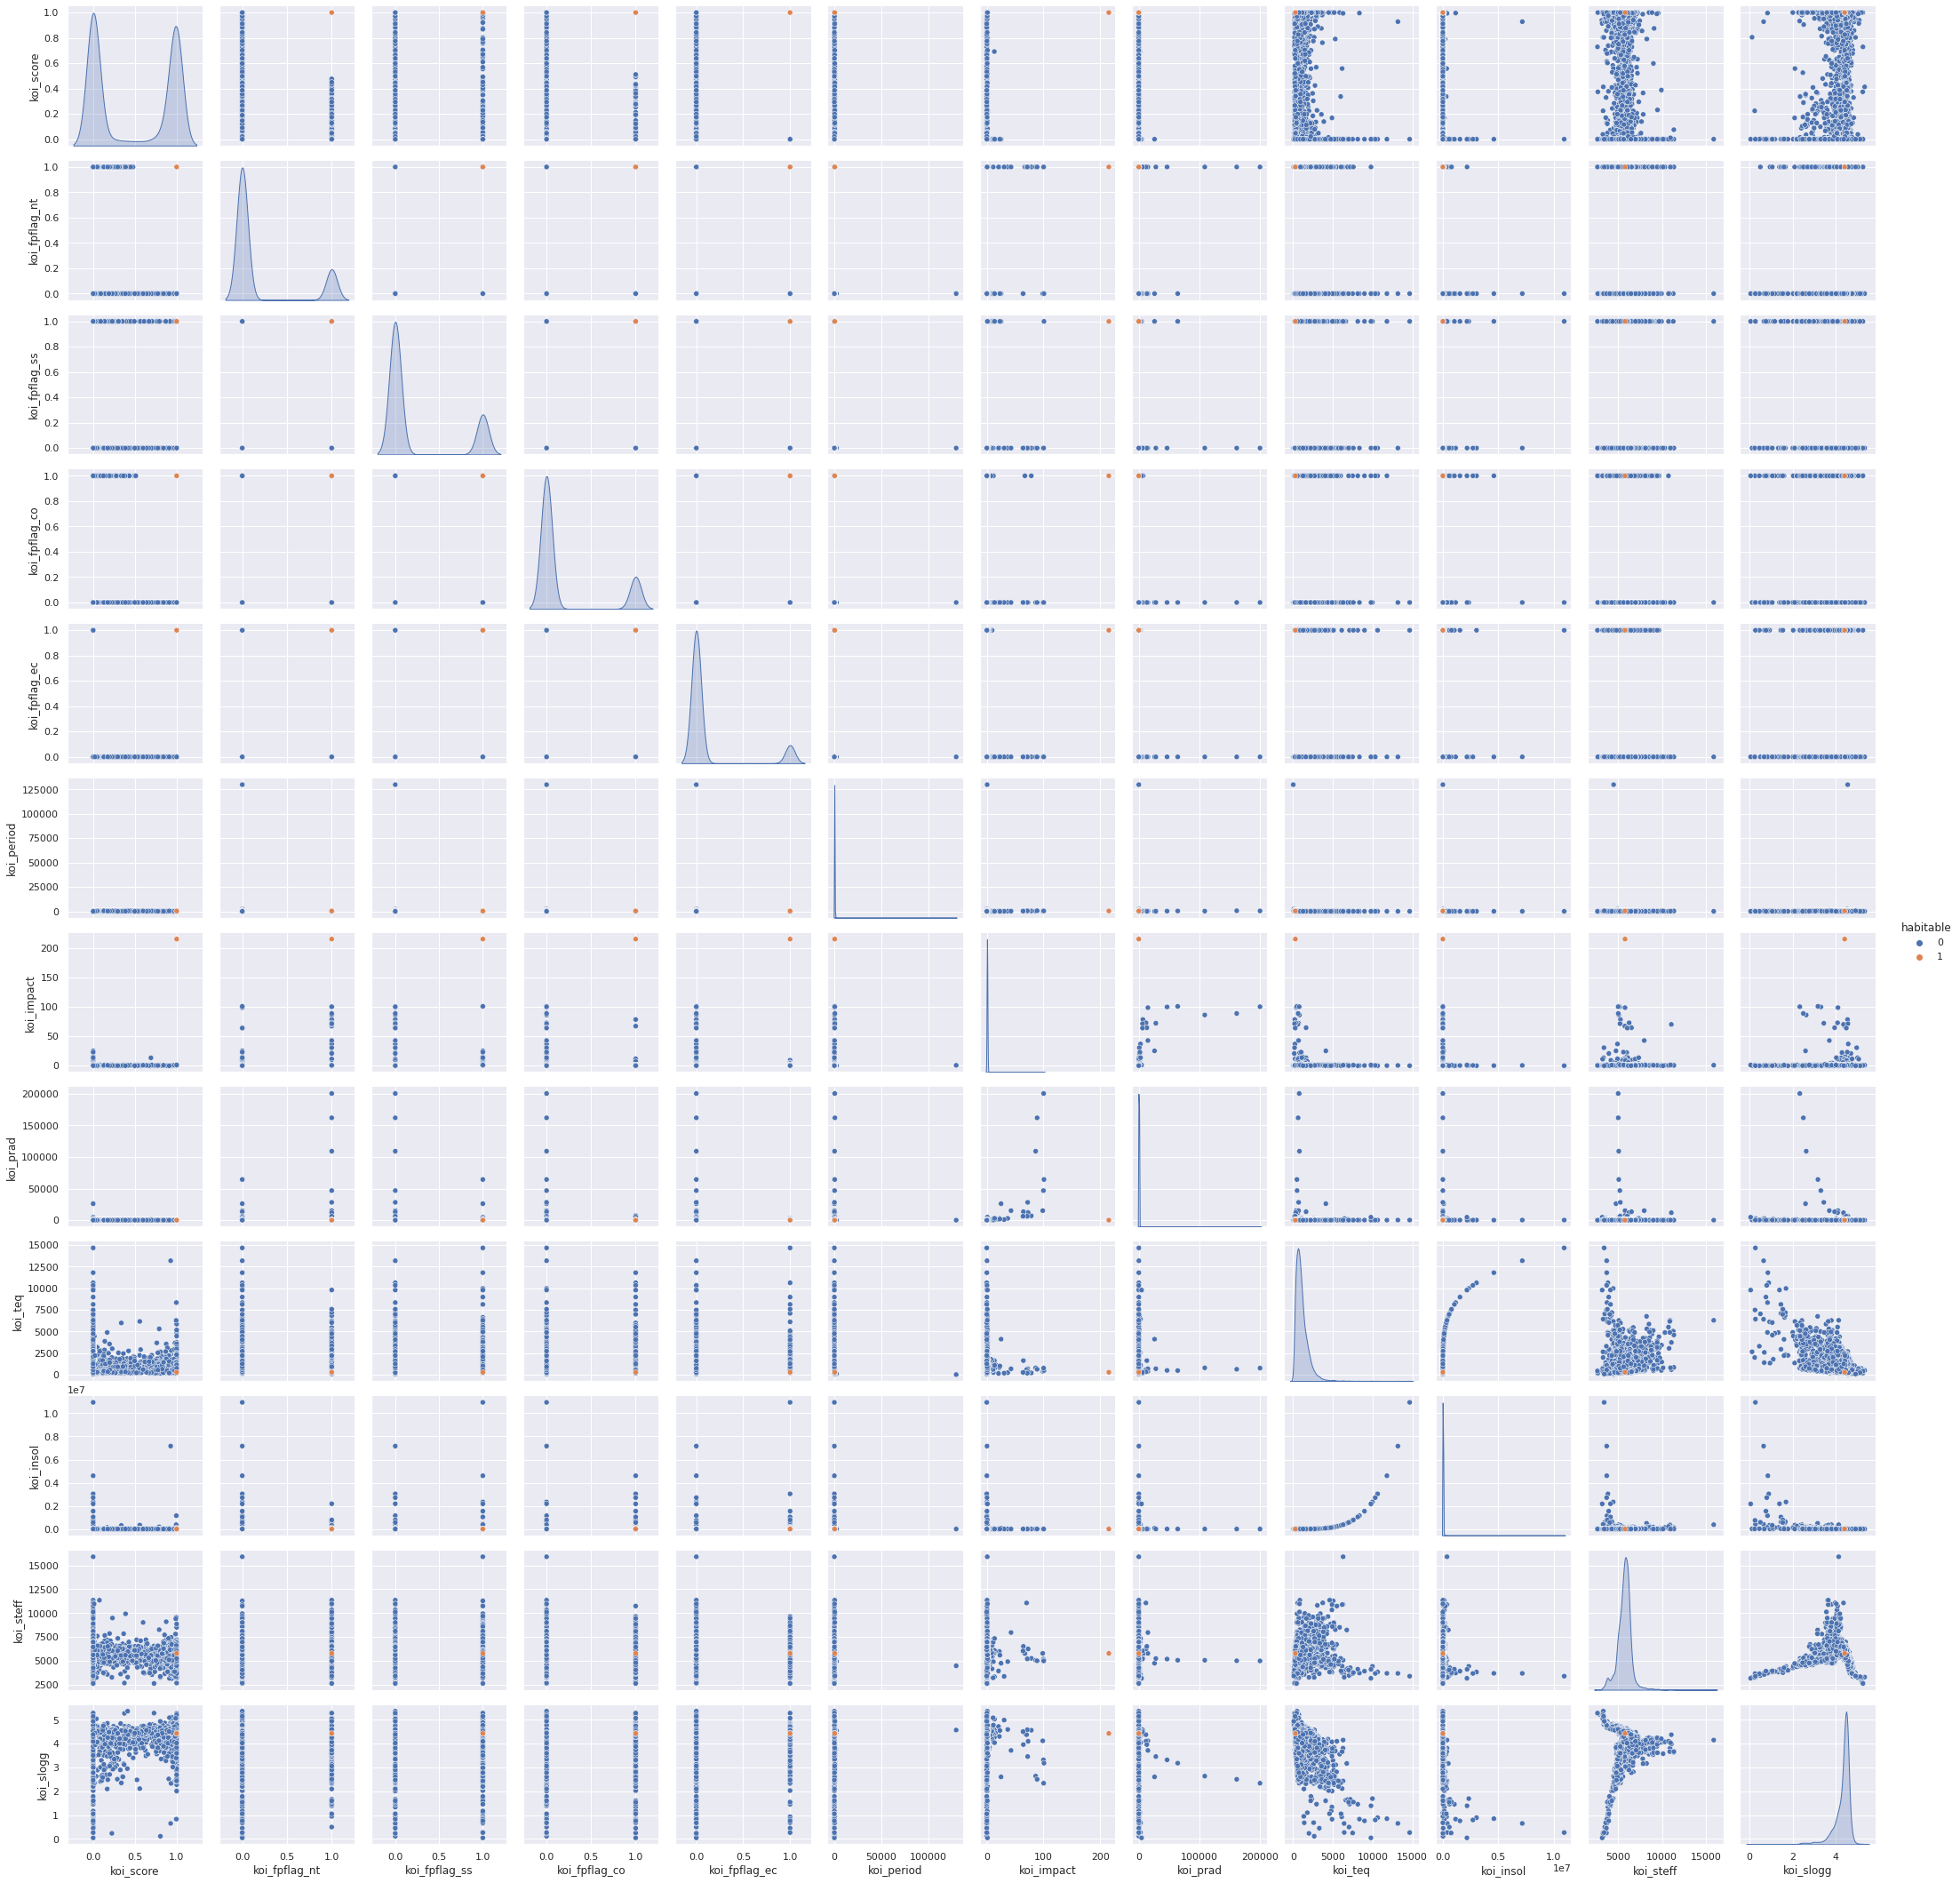

In [ ]:
sns.pairplot(DATOS, hue="habitable");# kind="kde"

### Clasificadores

In [ ]:
##Data = df[['koi_period', 'koi_impact','koi_prad','koi_teq','koi_insol','koi_steff','koi_slogg','koi_srad','koi_disposition']].dropna()
Data = DATOS[['koi_period', 'koi_impact','koi_prad','koi_slogg','habitable']].dropna()
X = Data.values[:,:-1]
y = Data.values[:,-1]

print(X.shape)
print(y.shape)


(9201, 4)
(9201,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

###### Gaussian Naive Bayes

In [ ]:
est = GaussianNB()
est.fit(X_train,y_train)
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

0.454


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.30107527 0.38043478 0.36956522 0.41304348 0.42391304 0.42391304
 0.36956522 0.41304348 0.35869565 0.33695652 0.42391304 0.30434783
 0.41304348 0.38043478 0.42391304 0.43478261 0.42391304 0.39130435
 0.30434783 0.41304348 0.45652174 0.38043478 0.41304348 0.45652174
 0.40217391 0.42391304 0.47826087 0.36956522 0.4673913  0.43478261
 0.4673913  0.29347826 0.40217391 0.34782609 0.41304348 0.44565217
 0.35869565 0.45652174 0.36956522 0.36956522 0.30434783 0.40217391
 0.34782609 0.41304348 0.43478261 0.35869565 0.33695652 0.33695652
 0.40217391 0.35869565 0.5        0.42391304 0.41304348 0.42391304
 0.39130435 0.34782609 0.35869565 0.40217391 0.43478261 0.40217391
 0.38043478 0.35869565 0.33695652 0.40217391 0.38043478 0.2826087
 0.34782609 0.42391304 0.38043478 0.38043478 0.42391304 0.36956522
 0.38043478 0.45652174 0.41304348 0.34782609 0.33695652 0.32608696
 0.41304348 0.4673913  0.44565217 0.40217391 0.33695652 0.35869565
 0.38043478 0.30434783 0.30434783 0.44565217 0.41304348 0.34782

###### Random Forest Classifier

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9907658881042911


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[1.         0.98913043 1.         1.         1.         0.98913043
 0.97826087 0.98913043 1.         0.98913043 1.         0.98913043
 0.98913043 0.98913043 1.         0.98913043 0.98913043 0.98913043
 1.         1.         1.         0.98913043 1.         1.
 1.         0.97826087 1.         1.         1.         0.98913043
 1.         1.         1.         0.98913043 0.97826087 0.98913043
 0.98913043 1.         0.98913043 1.         0.98913043 1.
 0.98913043 1.         1.         1.         1.         0.98913043
 1.         0.98913043 0.98913043 1.         1.         0.98913043
 0.98913043 1.         1.         0.97826087 0.98913043 1.
 1.         0.98913043 1.         1.         0.98913043 1.
 0.9673913  0.98913043 0.98913043 0.98913043 1.         0.98913043
 1.         0.97826087 1.         0.9673913  0.98913043 1.
 1.         1.         0.98913043 1.         0.97826087 0.97826087
 1.         1.         0.98913043 1.         0.98913043 0.98913043
 0.97826087 0.98913043 0.97826087 1

###### Decision Tree Classifier

In [ ]:
est = DecisionTreeClassifier(max_depth=10)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9896795219989136


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.98924731 1.         0.98913043 0.9673913  0.98913043 0.98913043
 1.         0.98913043 1.         0.9673913  0.98913043 0.97826087
 1.         1.         0.98913043 0.98913043 1.         0.97826087
 0.98913043 1.         1.         1.         0.97826087 0.97826087
 0.97826087 1.         0.98913043 0.98913043 0.97826087 1.
 1.         1.         0.98913043 1.         0.9673913  0.98913043
 0.97826087 0.98913043 0.97826087 0.98913043 0.98913043 1.
 0.98913043 0.97826087 1.         1.         0.98913043 0.98913043
 1.         0.98913043 0.97826087 1.         1.         0.98913043
 1.         0.98913043 1.         1.         0.98913043 1.
 0.98913043 0.98913043 1.         1.         0.98913043 1.
 0.95652174 0.97826087 1.         0.97826087 0.98913043 1.
 1.         0.97826087 0.9673913  1.         1.         1.
 0.98913043 0.98913043 0.98913043 0.98913043 1.         1.
 1.         1.         0.98913043 0.98913043 1.         1.
 1.         0.98913043 1.         0.9673913  1.         1.


###### Support Vector Machine

In [ ]:
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9907658881042911


In [ ]:
s = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.98924731 1.         0.98913043 0.9673913  0.98913043 1.
 0.98913043 0.97826087 0.98913043 0.97826087 1.         1.
 0.98913043 0.97826087 0.97826087 0.98913043 0.97826087 1.
 0.98913043 1.         1.         1.         1.         1.
 1.         0.98913043 0.97826087 1.         1.         1.
 1.         0.98913043 1.         1.         0.97826087 1.
 1.         0.97826087 1.         1.         0.98913043 1.
 1.         0.97826087 1.         0.98913043 0.98913043 1.
 1.         0.98913043 1.         1.         1.         1.
 1.         0.98913043 0.9673913  1.         1.         1.
 0.98913043 0.98913043 1.         0.98913043 1.         1.
 0.98913043 1.         1.         0.98913043 0.98913043 1.
 0.98913043 0.98913043 1.         0.98913043 0.98913043 0.98913043
 1.         1.         0.98913043 1.         1.         0.9673913
 1.         0.98913043 0.98913043 1.         0.98913043 0.98913043
 1.         1.         1.         0.98913043 1.         1.
 0.98913043 0.98913043 0.98913043

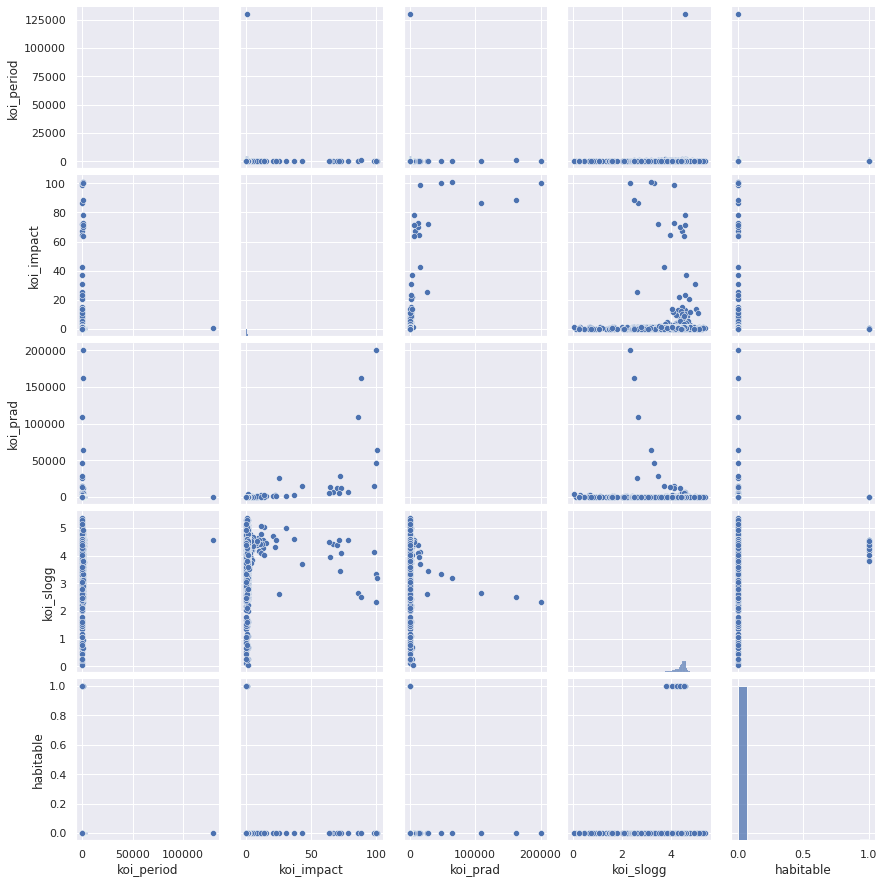

In [ ]:
sns.pairplot(Data);

### Regresión

In [ ]:
Data = DATOS[['koi_period', 'koi_impact','koi_prad','koi_slogg','koi_score']].dropna()
X = Data.values[:,:-1]
y = Data.values[:,-1]

print(X.shape)
print(y.shape)

(1781, 4)
(1781,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

###### DecisionTreeRegressor

In [ ]:
est = DecisionTreeRegressor()
est.fit(X_train,y_train)
pred = est.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

0.1718367083650542


In [ ]:
def radio(G, m, F):
  return np.sqrt(G*m/F)

%run -i code/utils.py

###Aprendizaje No Supervisado

In [ ]:
Data = DATOS[['koi_slogg','koi_steff','koi_teq','kepler_name']].dropna()
nombres = Data[['kepler_name']]
Data = DATOS[['koi_slogg','koi_steff','koi_teq']].dropna()
X = Data.values[:,:]
print(X.shape)
print(nombres.shape)

(9202, 3)
(9202, 1)


#### Koi_slogg - Koi_steff

#####DBSCAN

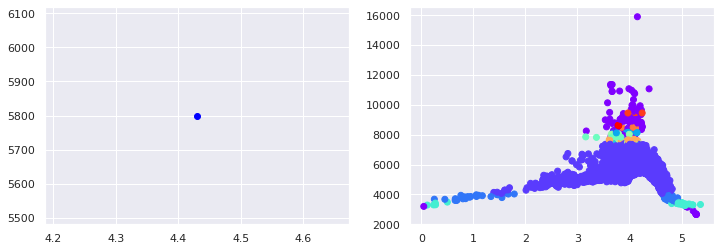

In [ ]:
DBS = DBSCAN(eps=20)
DBS.fit(X[:,[0,1]]) 
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[9201,0], X[9201,1], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,1], c=DBS.labels_, cmap='rainbow');
indexDBS1 = np.where(DBS.labels_ == DBS.labels_[9201])

#####KMeans

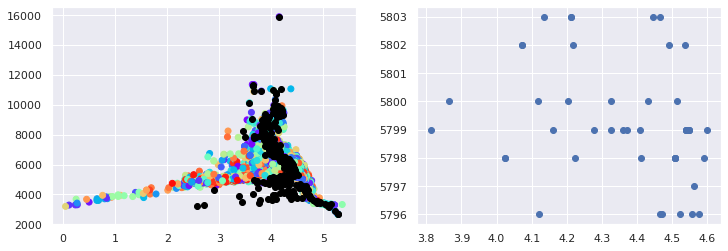

In [ ]:
kmeans = KMeans(n_clusters=400)  
kmeans.fit(X[:,[0,1]])  
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.subplot(122) 
indexKM1 = np.where(kmeans.labels_ == kmeans.labels_[9201])
plt.scatter(X[indexKM1,0],X[indexKM1,1])

#####Resultado

In [ ]:
select_indicesDB1 = list((indexDBS1)[0])
select_indices1 = list((indexKM1)[0])
nombres.iloc[select_indices1,0]

75            Unknown
497           Unknown
705      Kepler-293 b
722      Kepler-293 c
802           Unknown
905      Kepler-794 b
1030     Kepler-427 b
1505          Unknown
1509          Unknown
1678    Kepler-1199 b
1679          Unknown
2194          Unknown
2254    Kepler-1294 b
2330          Unknown
2637    Kepler-1412 b
3006          Unknown
3236     Kepler-545 b
3327          Unknown
3750          Unknown
3786          Unknown
3853          Unknown
4024          Unknown
4108          Unknown
4145    Kepler-1609 b
4330          Unknown
4413          Unknown
4489          Unknown
4491          Unknown
4583          Unknown
4645    Kepler-1451 b
5019          Unknown
5448          Unknown
5823          Unknown
6017          Unknown
6069          Unknown
6878          Unknown
6915          Unknown
7043          Unknown
7257          Unknown
7312          Unknown
7610          Unknown
8467          Unknown
8539          Unknown
8601          Unknown
9123          Unknown
9140      

#### Koi_slogg - Koi_teq

#####DBSCAN

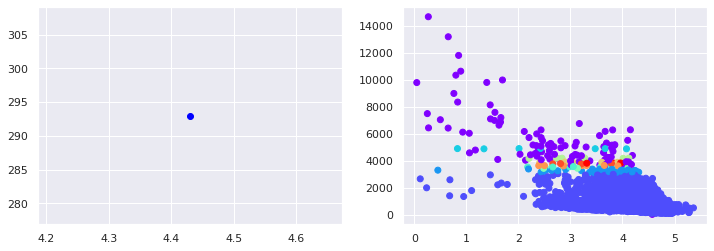

In [ ]:
DBS = DBSCAN(eps=20)
DBS.fit(X[:,[0,2]]) 
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[9201,0], X[9201,2], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,0],X[:,2], c=DBS.labels_, cmap='rainbow');
indexDBS2 = np.where(DBS.labels_ == DBS.labels_[9201])

#####Kmeans

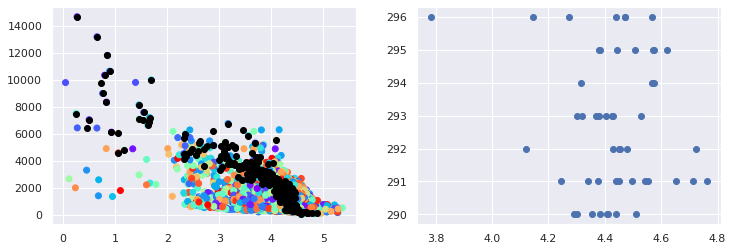

In [ ]:
kmeans = KMeans(n_clusters=400)  
kmeans.fit(X[:,[0,2]])  
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0],X[:,2], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.subplot(122) 
indexKM2 = np.where(kmeans.labels_ == kmeans.labels_[9201])
plt.scatter(X[indexKM2,0],X[indexKM2,2])

#####Resultado

In [ ]:
select_indicesDB2 = list((indexDBS2)[0])
select_indices2 = list((indexKM2)[0])
nombres.iloc[select_indices2,0]

497           Unknown
524           Unknown
2037     Kepler-395 c
2072          Unknown
2264          Unknown
2497     Kepler-397 c
2722          Unknown
2741          Unknown
2879      Kepler-90 h
2954          Unknown
4171          Unknown
4250          Unknown
4267          Unknown
4286    Kepler-1606 b
4994          Unknown
5033     Kepler-315 c
5134          Unknown
5217          Unknown
5432          Unknown
5659     Kepler-439 b
5676          Unknown
5954          Unknown
5984          Unknown
5990          Unknown
6034          Unknown
6037          Unknown
6078          Unknown
6085          Unknown
6117          Unknown
6193          Unknown
6226          Unknown
6339          Unknown
6457          Unknown
6514          Unknown
6533          Unknown
6571          Unknown
6659          Unknown
6687          Unknown
7199          Unknown
7280          Unknown
7354          Unknown
7447          Unknown
7450          Unknown
7501          Unknown
8293          Unknown
8389      

#### Koi_steff - Koi_teq

##### DBSCAN

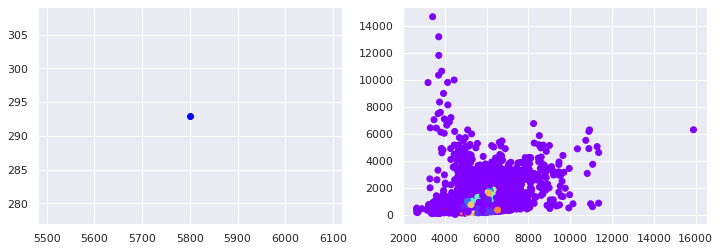

In [ ]:
DBS = DBSCAN(eps=20)
DBS.fit(X[:,[1,2]]) 
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[9201,1], X[9201,2], c="blue", cmap='rainbow');
plt.subplot(122) 
plt.scatter(X[:,1],X[:,2], c=DBS.labels_, cmap='rainbow');
indexDBS3 = np.where(DBS.labels_ == DBS.labels_[9201])

##### KMeans

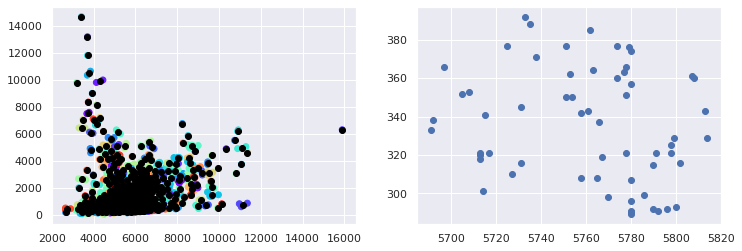

In [ ]:
kmeans = KMeans(n_clusters=400)  
kmeans.fit(X[:,[1,2]])  
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.subplot(122) 
indexKM3 = np.where(kmeans.labels_ == kmeans.labels_[9201])
plt.scatter(X[indexKM3,1],X[indexKM3,2])

##### Resultado

In [ ]:
select_indicesDB3 = list((indexDBS3)[0])
select_indices3 = list((indexKM3)[0])
nombres.iloc[select_indices3,0]

404           Unknown
497           Unknown
624      Kepler-782 b
639      Kepler-767 b
726           Unknown
758           Unknown
802           Unknown
1316     Kepler-302 c
1372     Kepler-344 c
1519     Kepler-950 b
1818          Unknown
2132          Unknown
2673          Unknown
2991     Kepler-610 c
3006          Unknown
3341     Kepler-630 b
3614          Unknown
3650          Unknown
3750          Unknown
4024          Unknown
4230          Unknown
4420          Unknown
4430          Unknown
4446          Unknown
4735          Unknown
4814          Unknown
4833          Unknown
4951          Unknown
5011          Unknown
5033     Kepler-315 c
5164          Unknown
5212    Kepler-1519 b
5307          Unknown
5681          Unknown
5703          Unknown
5777          Unknown
5858          Unknown
5984          Unknown
6074          Unknown
6084          Unknown
6172          Unknown
6193          Unknown
6225          Unknown
6238          Unknown
6473          Unknown
6508      

#### Resultados finales

##### DBSCAN

In [ ]:
lDBS = set(select_indicesDB1) & set(select_indicesDB2)
print("Common Elements", set(lDBS) & set(select_indicesDB3))

Common Elements {2, 5, 14, 8212, 8227, 41, 43, 8238, 49, 51, 52, 53, 8247, 60, 65, 69, 70, 8261, 75, 76, 78, 80, 8273, 84, 8277, 87, 8279, 8281, 92, 94, 97, 8291, 8297, 8298, 107, 109, 110, 113, 8308, 119, 120, 8313, 8316, 126, 8321, 130, 131, 132, 133, 8322, 136, 137, 138, 141, 148, 149, 8345, 8348, 157, 158, 159, 8352, 162, 164, 8356, 8357, 8361, 173, 174, 175, 8367, 8372, 181, 194, 195, 198, 8396, 8397, 212, 8404, 8408, 8410, 8414, 223, 231, 234, 236, 241, 8433, 246, 8447, 256, 8448, 260, 263, 8462, 8465, 8467, 276, 277, 281, 284, 285, 8480, 298, 299, 300, 8491, 8493, 303, 8503, 312, 313, 8504, 8506, 319, 8511, 322, 324, 8517, 8521, 334, 335, 341, 8538, 352, 8544, 8545, 356, 361, 371, 372, 373, 374, 8564, 8567, 377, 379, 380, 381, 8583, 8588, 398, 400, 8593, 406, 8598, 8605, 415, 417, 418, 420, 429, 430, 432, 433, 434, 8625, 8627, 8634, 443, 444, 445, 8640, 452, 455, 456, 463, 471, 8668, 478, 8673, 489, 492, 8685, 8697, 510, 514, 518, 522, 529, 536, 537, 8736, 547, 548, 550, 554, 55

##### Kmeans

In [ ]:
lKM = set(select_indices1) & set(select_indices2)
print("Common Elements", set(lKM) & set(select_indices3))
lkmFinal = set(lKM) & set(select_indices3)

Common Elements {9201, 492}


In [ ]:
DATOS['habitable'][(DATOS.koi_slogg.isin(Data.iloc[list(lkmFinal),0])) 
& (DATOS.koi_steff.isin(Data.iloc[list(lkmFinal),1])) 
& (DATOS.koi_teq.isin(Data.iloc[list(lkmFinal),2]))] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
DATOS[(DATOS['habitable'] == 1)].head()

,habitable,kepoi_name,koi_pdisposition,kepler_name,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg
497,1,K01206.01,CANDIDATE,Unknown,NaN,0,0,0,0,422.917678,0.7887,5.89,292.0,1.73,5796.0,4.12
9564,1,SOL,CANDIDATE,TIERRA,1.0,0,0,0,0,365.000000,215.0000,1.00,293.0,1.00,5800.0,4.43


#### Conclusiones

Una vez aplicado los métodos de aprendizaje no supervisado en el dataset de exoplanetas que nos proporciona la NASA en su misión de reconocimiento de planetas con tamaño similar a la tierra y que se encuentran en la zona de habitabilidad de su estrella, Kepler; Se puede concluir, a partir de los resultados obtenidos, que uno de los más de 9000 planetas es potencialmente habitable ya que comparte ciertas similitudes con nuestro planeta.

Es de destacar que este análisis fue realizado con las características de tránsito de propiedades de los objetos de interés de kepler. Para que un planeta sea habitable es necesario que albergue agua y una atmósfera con una composición similar a la tierra.